# Clustering: Agglomerative Hierarchical Clustering y Mean Shift Clustering

## Data Load & Min-max normalization

In [1]:
#
#pip install openpyxl

In [39]:
import pandas as pd

# Cargando el dataset
file_path = 'Clustering_data.xlsx'
data = pd.read_excel(file_path)

# Visualizando las primeras filas del dataset para entender su estructura


In [33]:
# Transformar los datos a un formato adecuado
# Primero, se separan los valores en cada fila y se convierten en una lista de floats

# Extraer y transformar los datos
formatted_data = data.iloc[:, 0].str.split(',', expand=True).astype(float)

# Mostrar las primeras filas del dataset transformado
formatted_data.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.536,0.292,-0.684,0.123,-0.118,0.346,-0.308,-0.113,0.401,-0.399,...,-0.205,-0.135,-0.063,-0.410,-0.223,-0.599,-0.136,-0.329,-0.132,-0.266
1,-0.496,-0.298,-0.529,0.073,-0.072,0.107,-0.316,-0.066,-0.168,-0.099,...,-0.150,0.189,0.007,-0.362,-0.151,-0.338,-0.031,-0.159,-0.097,-0.131
2,0.008,-0.031,-0.240,0.178,-0.120,0.317,-0.481,0.031,-0.077,0.063,...,0.121,-0.035,0.101,-0.098,-0.172,-0.290,0.033,-0.342,-0.321,-0.238
3,-0.188,-0.180,-0.062,-0.104,-0.136,-0.061,-0.216,-0.143,0.068,-0.189,...,-0.141,0.146,-0.145,-0.527,-0.292,-0.663,-0.078,-0.194,-0.151,-0.268
4,0.038,0.155,-0.203,-0.088,-0.084,-0.164,-0.145,-0.168,0.008,0.143,...,-0.097,0.019,-0.084,0.164,-0.165,-0.126,-0.112,0.029,-0.138,0.148


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Creando el objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizando los datos
normalized_data = scaler.fit_transform(formatted_data)

# Convirtiendo los datos normalizados de nuevo a un DataFrame para una mejor visualización
normalized_df = pd.DataFrame(normalized_data, columns=formatted_data.columns)

# Visualizando las primeras filas del dataset normalizado
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.294244,0.705043,0.183047,0.610883,0.287570,0.806475,0.179009,0.499009,0.890763,0.184259,...,0.448750,0.378264,0.459459,0.300824,0.339323,0.180758,0.348815,0.324151,0.526825,0.128294
1,0.315761,0.143673,0.263651,0.559548,0.330241,0.630611,0.174344,0.522299,0.433735,0.462037,...,0.462500,0.606916,0.529530,0.333791,0.389081,0.332945,0.448341,0.433056,0.543741,0.221914
2,0.586875,0.397716,0.413937,0.667351,0.285714,0.785136,0.078134,0.570367,0.506827,0.612037,...,0.530250,0.448836,0.623624,0.515110,0.374568,0.360933,0.509005,0.315823,0.435476,0.147712
3,0.481442,0.255947,0.506500,0.377823,0.270872,0.506990,0.232653,0.484143,0.623293,0.378704,...,0.464750,0.576570,0.377377,0.220467,0.291638,0.143440,0.403791,0.410634,0.517641,0.126907
4,0.603012,0.574691,0.433177,0.394251,0.319109,0.431199,0.274052,0.471754,0.575100,0.686111,...,0.475750,0.486944,0.438438,0.695055,0.379406,0.456560,0.371564,0.553491,0.523925,0.415395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.622898,0.306042,0.413515,0.446012,0.430161,0.234592,0.268624,0.634316,0.429888,0.688956,...,0.588026,0.671649,0.293515,0.717018,0.714547,0.834227,0.629533,0.680075,0.565029,0.244265
392,0.939756,0.400465,0.445440,0.411823,0.442294,0.550884,0.249067,0.554994,0.359155,0.657030,...,0.465734,0.461876,0.329323,0.672249,0.492580,0.539794,0.462993,0.710368,0.675320,0.285084
393,0.456591,0.371809,0.250853,0.384196,0.250668,0.718879,0.601500,0.552159,0.513488,0.399688,...,0.632761,0.636874,0.347701,0.309878,0.313533,0.273249,0.417879,0.287078,0.287468,0.214112
394,0.730001,0.326451,0.644449,0.421902,0.304080,0.254319,0.308927,0.537033,0.364900,0.587591,...,0.592278,0.584900,0.467782,0.907576,0.574303,0.642114,0.558029,0.515728,0.671515,0.313230


# t-SNE antes de clustering

**t-SNE (t-Distributed Stochastic Neighbor Embedding)**
**Concepto y Características**

- t-SNE es una técnica de reducción de dimensionalidad y visualización de datos, especialmente útil para la visualización de datos de alta dimensión.
- El algoritmo modela cada punto de datos en un espacio multidimensional y luego los proyecta en dos o tres dimensiones para facilitar su visualización.
- t-SNE funciona minimizando la divergencia entre dos distribuciones: una que mide las similitudes de los pares de puntos de datos en el espacio de alta dimensión, y otra que mide las similitudes de los pares de puntos en el espacio de baja dimensión.

**Ventajas y Desventajas**

- Ventajas: Excelente para visualizar clusters y estructuras en datos de alta dimensión; efectivo en la preservación de las estructuras locales de los datos.
- Desventajas: Los resultados pueden variar significativamente con diferentes ajustes de hiperparámetros; no preserva necesariamente las distancias globales; computacionalmente intensivo, especialmente para datasets muy grandes.

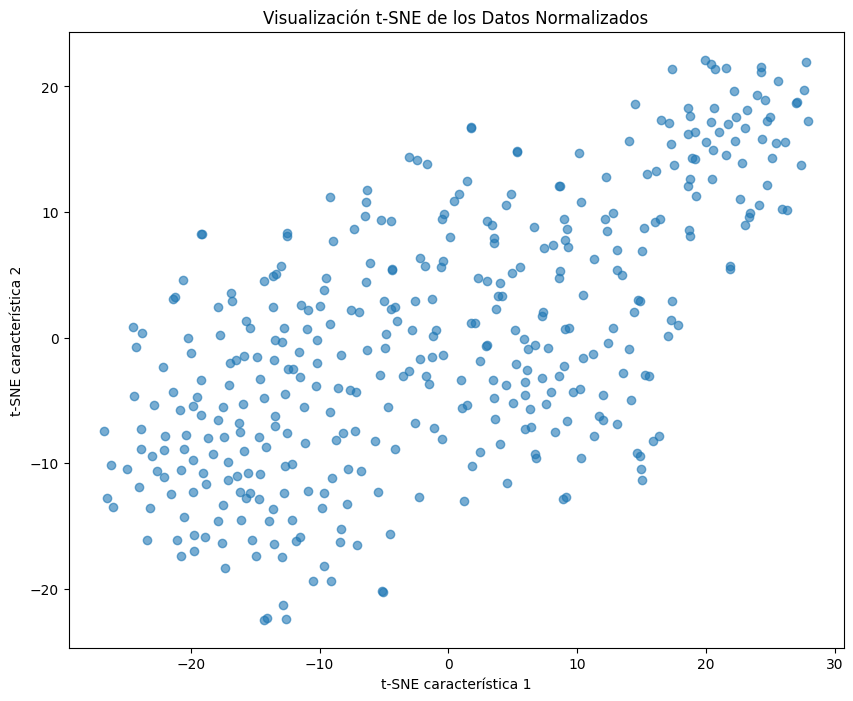

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Aplicando t-SNE a los datos normalizados
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(normalized_data)

# Visualización de los datos normalizados usando t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.6)
plt.title('Visualización t-SNE de los Datos Normalizados')
plt.xlabel('t-SNE característica 1')
plt.ylabel('t-SNE característica 2')
plt.show()



In [25]:

print(tsne_results.shape)

(396, 2)


# Agglomerative Hierarchical Clustering

**Concepto y Características**

- El Agglomerative Hierarchical Clustering es un tipo de clustering jerárquico que construye clusters de manera ascendente. Comienza tratando cada punto de datos como un cluster individual y luego fusiona progresivamente estos clusters en grupos más grandes basándose en su similitud.
- Este método no requiere especificar el número de clusters de antemano. En cambio, se construye un dendrograma, que es un árbol que muestra la disposición de los clusters formados en cada paso.
- La similitud entre clusters se mide generalmente mediante métricas como la distancia euclidiana, la distancia de Manhattan, o la distancia de Minkowski.
Existen diferentes enfoques para decidir cuáles clusters fusionar en cada paso, como el enlace único (la menor distancia entre dos puntos en diferentes clusters), el enlace completo (la mayor distancia entre dos puntos en diferentes clusters), y el enlace promedio (la distancia promedio entre todos los pares de puntos en dos clusters).

**Ventajas y Desventajas**

- Ventajas: Permite una representación visual intuitiva a través de dendrogramas; no requiere especificar el número de clusters; es útil para entender la estructura jerárquica y las relaciones entre los datos.
- Desventajas: Computacionalmente costoso para grandes datasets; sensible a outliers; la decisión de fusionar se toma de forma local, por lo que las elecciones tempranas pueden tener impacto en las etapas finales.


In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Función para calcular el dendrograma para Agglomerative Clustering
def plot_dendrogram(model, **kwargs):
    # Crear el enlace para el dendrograma
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Dibujar el dendrograma
    dendrogram(linkage_matrix, **kwargs)

In [43]:
# Aplicando Agglomerative Hierarchical Clustering para diferentes valores de k
k_values = range(2, 9)
silhouette_scores = []
models = []

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(normalized_data)
    score = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores.append(score)
    models.append(model)

In [44]:
# Dibujar el dendrograma para visualizar la estructura de los clusters
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(normalized_df)

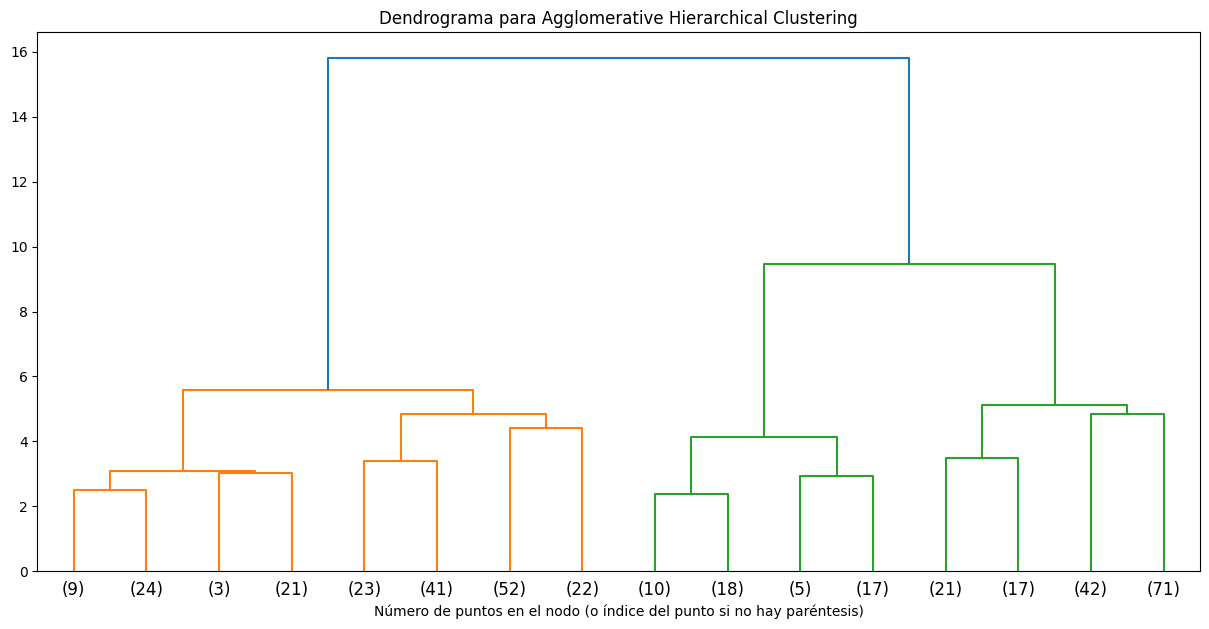

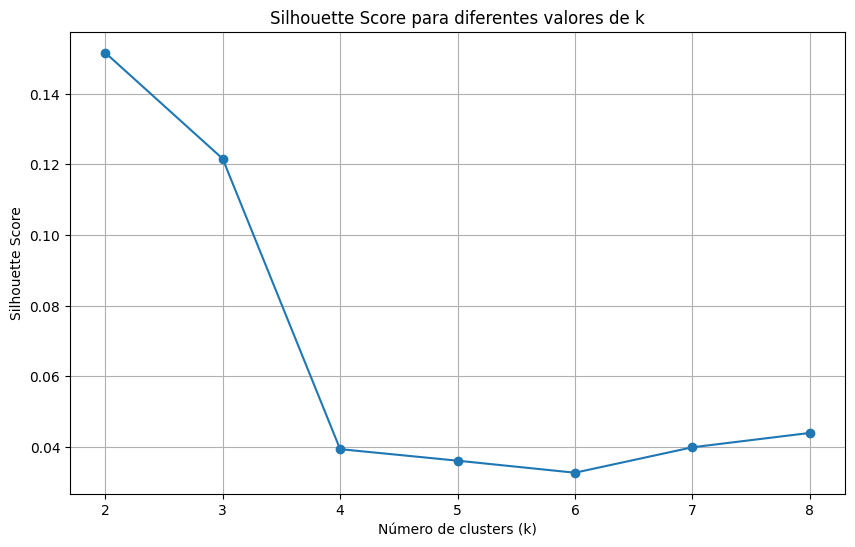

In [45]:
# Gráfico del dendrograma
plt.figure(figsize=(15, 7))
plt.title("Dendrograma para Agglomerative Hierarchical Clustering")
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de puntos en el nodo (o índice del punto si no hay paréntesis)")
plt.show()

# Gráfico de los scores de silueta para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xticks(k_values)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para diferentes valores de k")
plt.grid(True)
plt.show()

Valor óptimo de k: 2


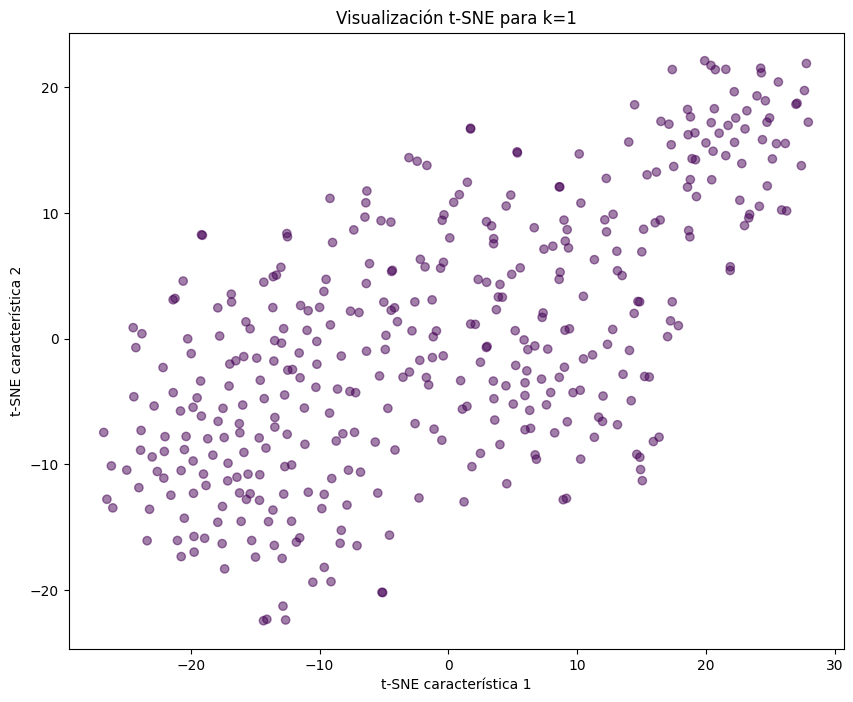

Cluster 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

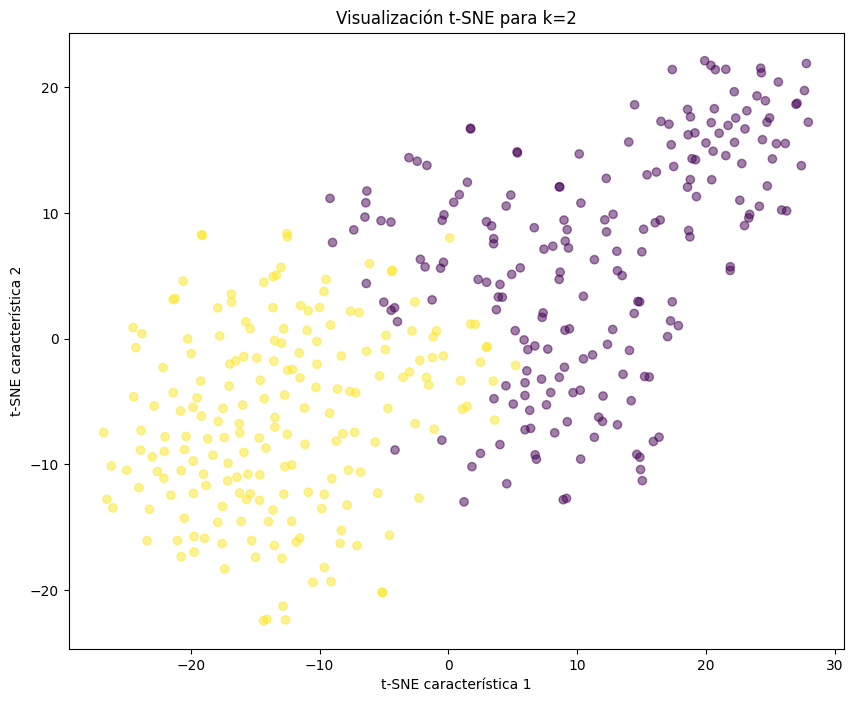

Cluster 1: [0, 1, 2, 3, 6, 7, 11, 12, 15, 16, 17, 18, 20, 22, 23, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 43, 45, 49, 51, 55, 56, 58, 60, 61, 63, 64, 66, 67, 69, 70, 71, 73, 74, 77, 78, 84, 88, 89, 90, 92, 98, 99, 100, 104, 107, 109, 110, 112, 113, 117, 118, 120, 121, 122, 123, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 144, 146, 148, 149, 150, 153, 155, 156, 160, 161, 162, 163, 166, 168, 169, 170, 172, 174, 177, 179, 181, 184, 190, 192, 198, 199, 201, 202, 203, 204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 226, 227, 228, 230, 234, 235, 236, 238, 241, 242, 245, 246, 248, 250, 252, 253, 259, 260, 261, 262, 264, 265, 267, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 283, 286, 287, 288, 292, 297, 299, 301, 304, 305, 306, 308, 309, 318, 322, 330, 337, 338, 340, 341, 342, 348, 351, 352, 355, 357, 362, 363, 366, 372, 373, 374, 380, 381, 383, 384, 387, 388, 389, 393]
Cluster 0: [4, 5, 8, 9, 10, 13, 14, 19, 21, 24, 26, 27, 34, 38, 39, 40,

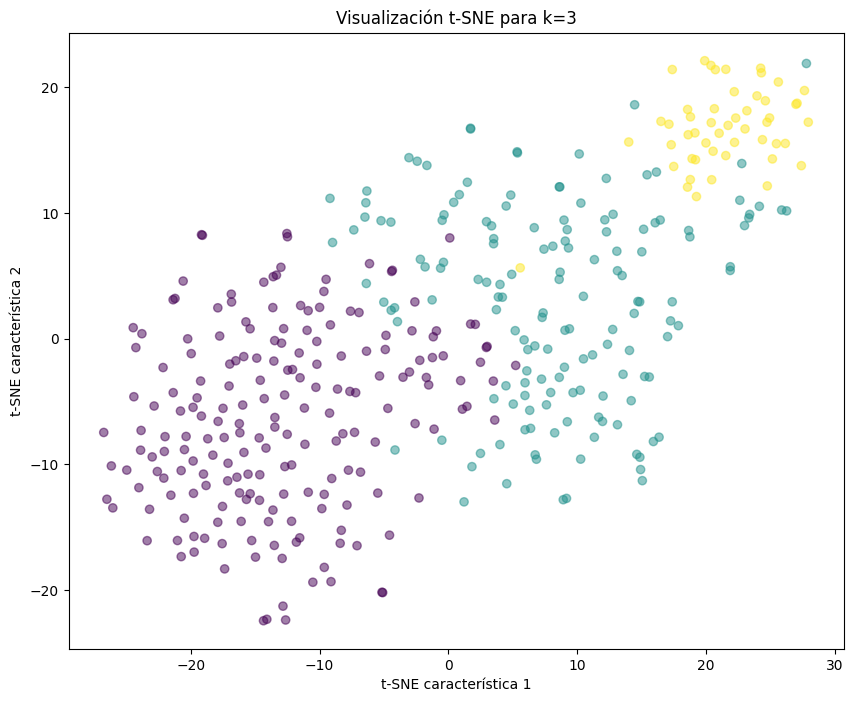

Cluster 0: [0, 1, 2, 3, 6, 7, 11, 12, 15, 16, 17, 18, 20, 22, 23, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 43, 45, 49, 51, 55, 56, 58, 60, 61, 63, 64, 66, 67, 69, 70, 71, 73, 74, 77, 78, 84, 88, 89, 90, 92, 98, 99, 100, 104, 107, 109, 110, 112, 113, 117, 118, 120, 121, 122, 123, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 144, 146, 148, 149, 150, 153, 155, 156, 160, 161, 162, 163, 166, 168, 169, 170, 172, 174, 177, 179, 181, 184, 190, 192, 198, 199, 201, 202, 203, 204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 226, 227, 228, 230, 234, 235, 236, 238, 241, 242, 245, 246, 248, 250, 252, 253, 259, 260, 261, 262, 264, 265, 267, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 283, 286, 287, 288, 292, 297, 299, 301, 304, 305, 306, 308, 309, 318, 322, 330, 337, 338, 340, 341, 342, 348, 351, 352, 355, 357, 362, 363, 366, 372, 373, 374, 380, 381, 383, 384, 387, 388, 389, 393]
Cluster 1: [4, 5, 8, 10, 14, 19, 21, 24, 26, 27, 34, 38, 39, 41, 42, 44

In [51]:
# Determinar k óptimo
optimal_k_index = np.argmax(silhouette_scores)
optimal_k = k_values[optimal_k_index]
print("Valor óptimo de k:", optimal_k)

# Visualización t-SNE post-clustering para k óptimo, k-1, k+1
k_values_to_plot = [optimal_k - 1, optimal_k, optimal_k + 1]

for k in k_values_to_plot:
    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(normalized_data)

    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(normalized_data)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, alpha=0.5)
    plt.title(f"Visualización t-SNE para k={k}")
    plt.xlabel("t-SNE característica 1")
    plt.ylabel("t-SNE característica 2")
    plt.show()

    clusters = {}
    for i, label in enumerate(cluster_labels):
        clusters.setdefault(label, []).append(i)  

    # Printing indices in each cluster
    for cluster, indices in clusters.items():
        print(f"Cluster {cluster}: {indices}")

# Mean Shift Clustering

**Concepto y Características**

- Mean Shift Clustering es un algoritmo basado en el concepto de densidad de probabilidad de los datos. Busca el punto de mayor densidad en una región y actualiza la posición de los puntos hacia las áreas de mayor densidad.
- Este método utiliza un parámetro llamado "ancho de banda", que determina el tamaño de la ventana dentro de la cual se calcula la densidad.
- Mean Shift no asume ninguna forma previa para los clusters, lo que lo hace adecuado para identificar clusters de formas irregulares.
- El algoritmo itera moviendo cada punto hacia la media de los puntos dentro de su ventana, hasta que la convergencia es alcanzada.

**Ventajas y Desventajas**

- Ventajas: No requiere especificar el número de clusters; capaz de manejar clusters de formas complejas; robusto a outliers.
- Desventajas: La elección del ancho de banda es crucial y puede ser difícil de estimar; computacionalmente intensivo para grandes datasets; puede converger a puntos locales de densidad alta, lo que lleva a resultados subóptimos.

In [53]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

# Set random seeds for reproducibility
np.random.seed(42)

# Función para probar Mean Shift con un dado bandwidth
def try_mean_shift(data, bandwidth):
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    try:
        labels = model.fit_predict(data)
        n_clusters = len(np.unique(labels))
        if n_clusters > 1:  # Solo consideramos casos con más de un cluster
            return model, labels, n_clusters
    except ValueError:
        pass
    return None, None, None

# Estimar el ancho de banda inicial
initial_bandwidth = estimate_bandwidth(normalized_data, quantile=0.15)

# Definir rangos de búsqueda para el bandwidth
lower_bandwidths = np.linspace(max(0, initial_bandwidth - 1), initial_bandwidth, num=5)
upper_bandwidths = np.linspace(initial_bandwidth, initial_bandwidth + 2, num=5)
search_bandwidths = np.unique(np.concatenate((lower_bandwidths, upper_bandwidths)))
# Manually add a value to the search space
search_bandwidths = np.append(search_bandwidths, [0.896, 1.23, 2, 3, 4, 5])
# Sort the bandwidths ascendingly
search_bandwidths = np.sort(search_bandwidths)

# Búsqueda de bandwidths exitosos
bandwidth_results = []
silhouette_scores = []
valid_bandwidths = []

for bandwidth in search_bandwidths:
    model, labels, n_clusters = try_mean_shift(normalized_data, bandwidth)
    if model is not None:
        silhouette_avg = silhouette_score(normalized_data, labels)
        silhouette_scores.append(silhouette_avg)
        valid_bandwidths.append(bandwidth)
        bandwidth_results.append((bandwidth, silhouette_avg, n_clusters))
        print(f"Bandwidth exitoso: {bandwidth}, Silhouette Score: {silhouette_avg}, Número de Clusters: {n_clusters}")

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.459146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.4591462971053113, Silhouette Score: 0.004318474605407513, Número de Clusters: 393


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.709146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.7091462971053113, Silhouette Score: 0.03374448899732338, Número de Clusters: 326


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.959146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.9591462971053113, Silhouette Score: 0.041357769914714, Número de Clusters: 188


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.209146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 1.2091462971053113, Silhouette Score: -0.008939710960691766, Número de Clusters: 69


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62



Mejor bandwidth: 0.896 con Silhouette Score: 0.06078188597705355 y Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


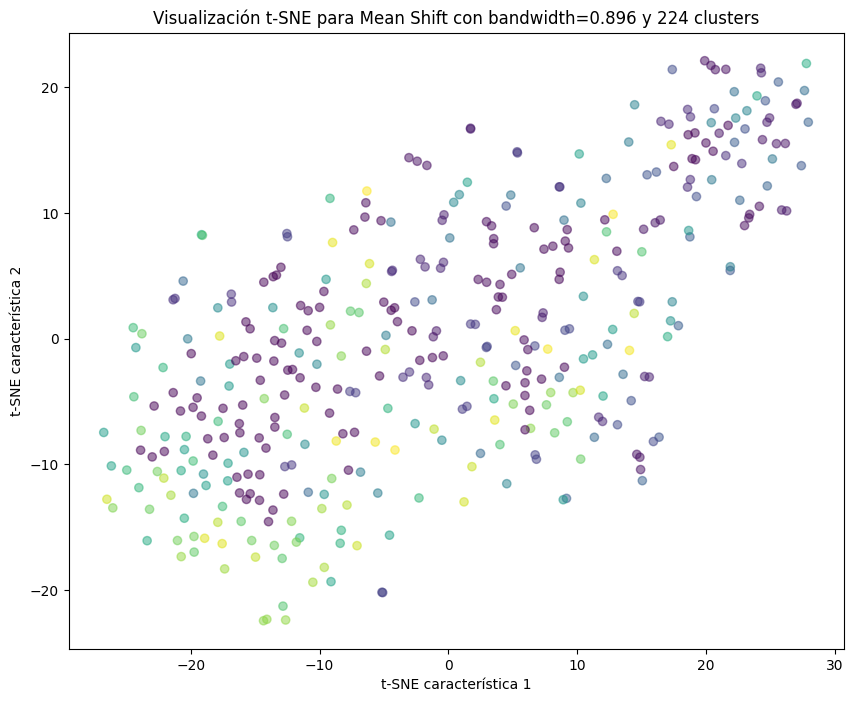

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Seleccionar el mejor bandwidth
if bandwidth_results:
    best_bandwidth, best_score, best_clusters = max(
        bandwidth_results, key=lambda x: x[1]
    )
    print(
        "\nMejor bandwidth:",
        best_bandwidth,
        "con Silhouette Score:",
        best_score,
        "y Número de Clusters:",
        best_clusters,
    )

    # Generar t-SNE para el mejor bandwidth
    model = MeanShift(bandwidth=best_bandwidth, bin_seeding=True)
    labels = model.fit_predict(normalized_data)
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(normalized_data)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, alpha=0.5)
    plt.title(
        f"Visualización t-SNE para Mean Shift con bandwidth={best_bandwidth} y {best_clusters} clusters"
    )
    plt.xlabel("t-SNE característica 1")
    plt.ylabel("t-SNE característica 2")
    plt.show()

    clusters = {}
    for i, label in enumerate(labels):
        clusters.setdefault(label, []).append(i)

    # Printing indices in each cluster
    for cluster, indices in clusters.items():
        print(f"Cluster {cluster}: {indices}")
else:
    print("No se encontraron bandwidths adecuados.")

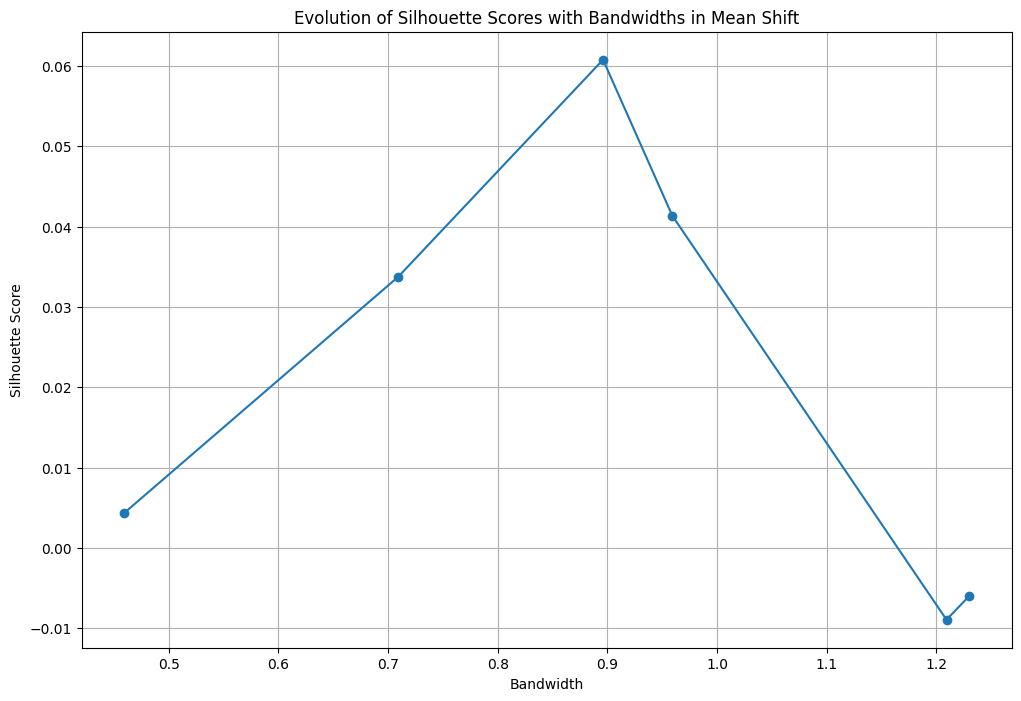

In [55]:
# Plotting the Silhouette scores against bandwidths
plt.figure(figsize=(12, 8))
plt.plot(valid_bandwidths, silhouette_scores, marker='o')
plt.title('Evolution of Silhouette Scores with Bandwidths in Mean Shift')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.459146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.4591462971053113, Silhouette Score: 0.004318474605407513, Número de Clusters: 393


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.709146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.7091462971053113, Silhouette Score: 0.03374448899732338, Número de Clusters: 326


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.959146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 0.9591462971053113, Silhouette Score: 0.041357769914714, Número de Clusters: 188


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.209146, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 1.2091462971053113, Silhouette Score: -0.008939710960691766, Número de Clusters: 69


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62

Mejor bandwidth: 0.896 con Silhouette Score: 0.06078188597705355 y Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


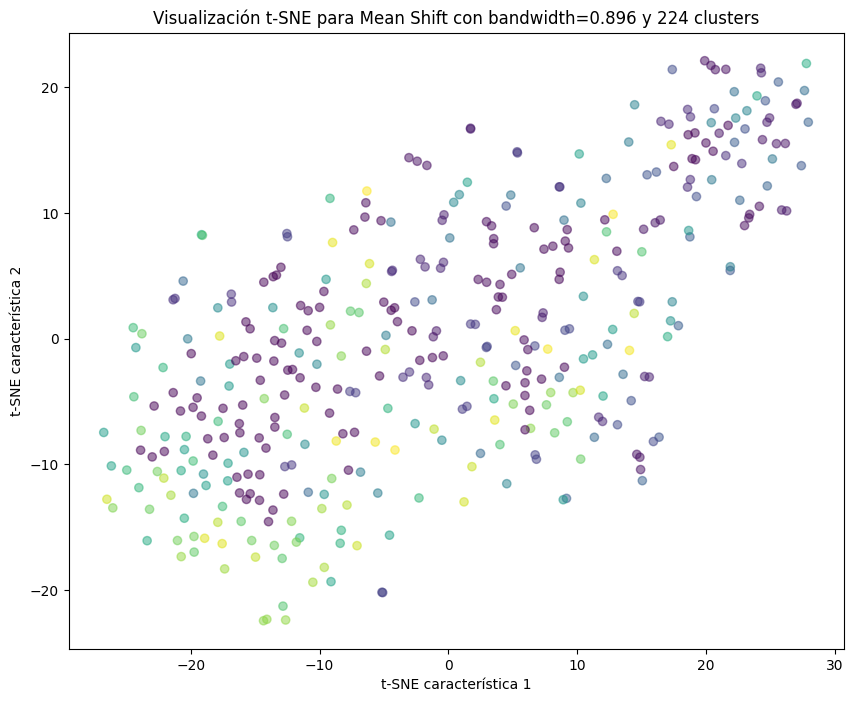

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

In [56]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

# Función para probar Mean Shift con un dado bandwidth
def try_mean_shift(data, bandwidth):
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    try:
        labels = model.fit_predict(data)
        n_clusters = len(np.unique(labels))
        if n_clusters > 1:  # Solo consideramos casos con más de un cluster
            return model, labels, n_clusters
    except ValueError:
        pass
    return None, None, None

# Estimar el ancho de banda inicial
initial_bandwidth = estimate_bandwidth(normalized_data, quantile=0.15)

# Definir rangos de búsqueda para el bandwidth
lower_bandwidths = np.linspace(max(0, initial_bandwidth - 1), initial_bandwidth, num=5)
upper_bandwidths = np.linspace(initial_bandwidth, initial_bandwidth + 2, num=5)
search_bandwidths = np.unique(np.concatenate((lower_bandwidths, upper_bandwidths)))
# Añadir 1.23 como un valor de búsqueda 
search_bandwidths = np.append(search_bandwidths, [0.896, 1.23, 2, 3, 4, 5])
search_bandwidths = np.sort(search_bandwidths)

# Prepare lists to store results
silhouette_scores = []
valid_bandwidths = []

# Búsqueda de bandwidths exitosos
bandwidth_results = []
for bandwidth in search_bandwidths:
    model, labels, n_clusters = try_mean_shift(normalized_data, bandwidth)
    if model is not None:
        silhouette_avg = silhouette_score(normalized_data, labels)
        bandwidth_results.append((bandwidth, silhouette_avg, n_clusters))
        print(f"Bandwidth exitoso: {bandwidth}, Silhouette Score: {silhouette_avg}, Número de Clusters: {n_clusters}")

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Seleccionar el mejor bandwidth
if bandwidth_results:
    best_bandwidth, best_score, best_clusters = max(bandwidth_results, key=lambda x: x[1])
    print("\nMejor bandwidth:", best_bandwidth, "con Silhouette Score:", best_score, "y Número de Clusters:", best_clusters)

    # Generar t-SNE para el mejor bandwidth
    model = MeanShift(bandwidth=best_bandwidth, bin_seeding=True)
    labels = model.fit_predict(normalized_data)
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(normalized_data)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, alpha=0.5)
    plt.title(f'Visualización t-SNE para Mean Shift con bandwidth={best_bandwidth} y {best_clusters} clusters')
    plt.xlabel('t-SNE característica 1')
    plt.ylabel('t-SNE característica 2')
    plt.show()
    
    clusters = {}
    for i, label in enumerate(labels):
        clusters.setdefault(label, []).append(i)

    # Printing indices in each cluster
    for cluster, indices in clusters.items():
        print(f"Cluster {cluster}: {indices}")
    
else:
    print("No se encontraron bandwidths adecuados.")        

### 'Try Hard' search for the best silhouette score


Probando con quantile: 0.05


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.306383, using data points as seeds.
  warnings.warn(


  Bandwidth encontrado: 0.30638272255545607, pero con número de clusters no adecuado para Silhouette Score: 396


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.806383, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.8063827225554561, Silhouette Score: 0.0517442706307101, Número de Clusters: 272


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.056383, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.056382722555456, Silhouette Score: 0.010677850994991876, Número de Clusters: 132


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62
  Mejor bandwidth: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


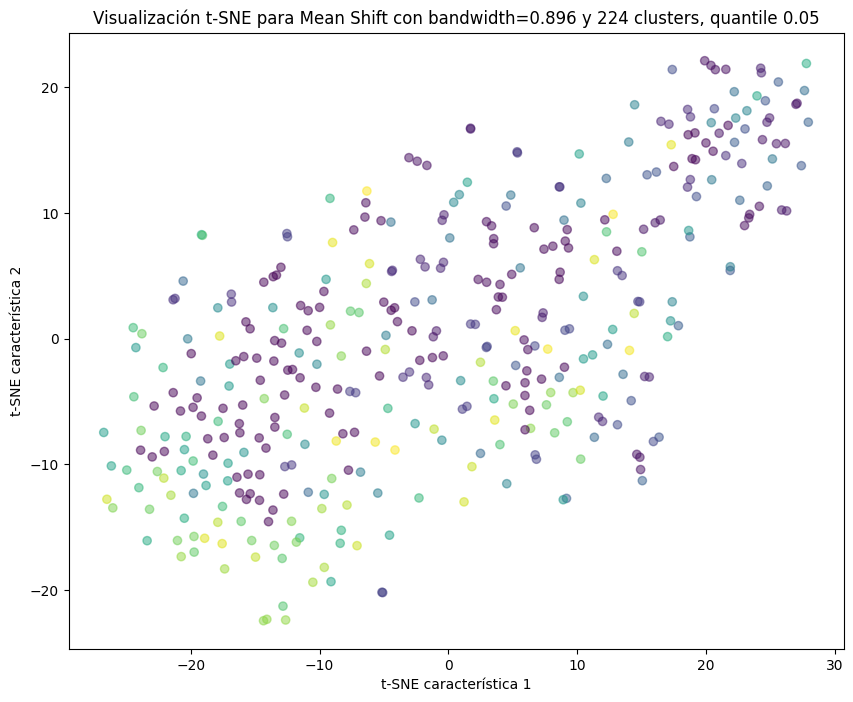

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.396034, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.39603361803074333, Silhouette Score: 0.001987461597244932, Número de Clusters: 395


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896034, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.8960336180307433, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.146034, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.1460336180307433, Silhouette Score: -0.011155133559946602, Número de Clusters: 96


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62
  Mejor bandwidth: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


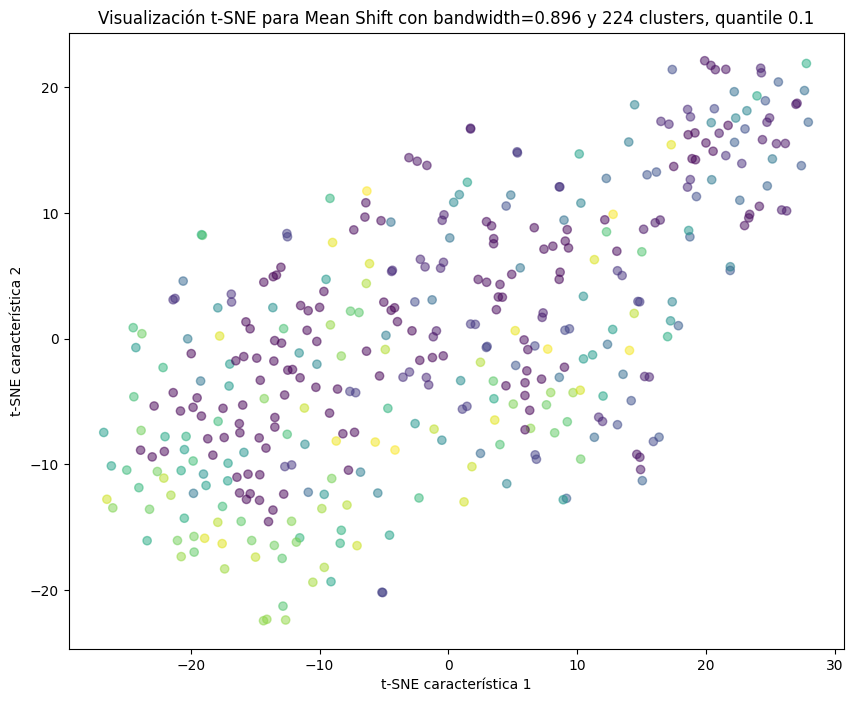

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.459146, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.4591462971053113, Silhouette Score: 0.004318474605407513, Número de Clusters: 393


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.709146, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.7091462971053113, Silhouette Score: 0.03374448899732338, Número de Clusters: 326


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.959146, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.9591462971053113, Silhouette Score: 0.041357769914714, Número de Clusters: 188


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.209146, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.2091462971053113, Silhouette Score: -0.008939710960691766, Número de Clusters: 69


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62
  Mejor bandwidth: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


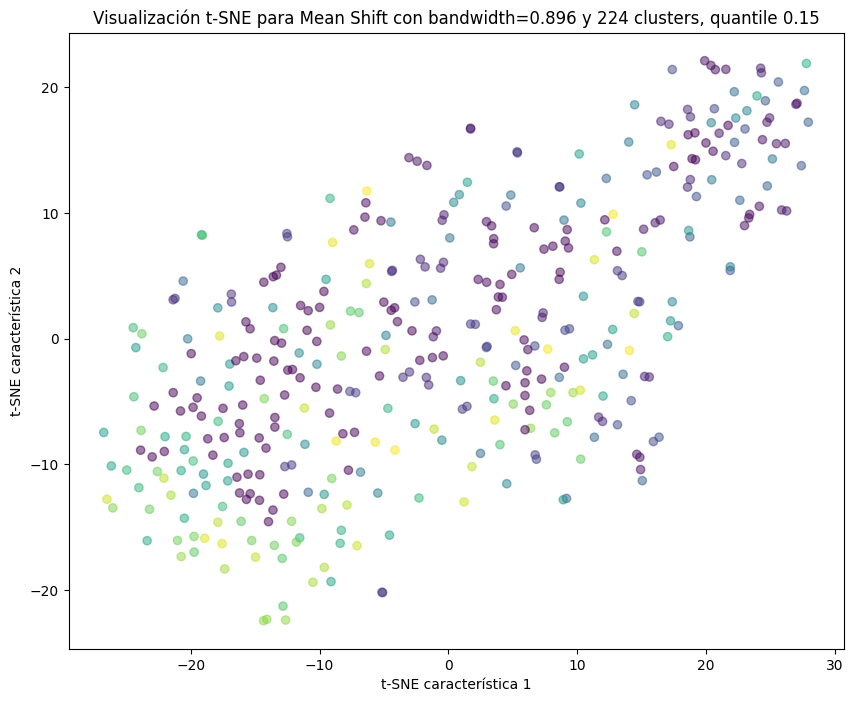

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.760980, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.760979755321026, Silhouette Score: 0.05207034014739725, Número de Clusters: 305


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.010980, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.010979755321026, Silhouette Score: 0.021448243540609938, Número de Clusters: 154


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62
  Mejor bandwidth: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


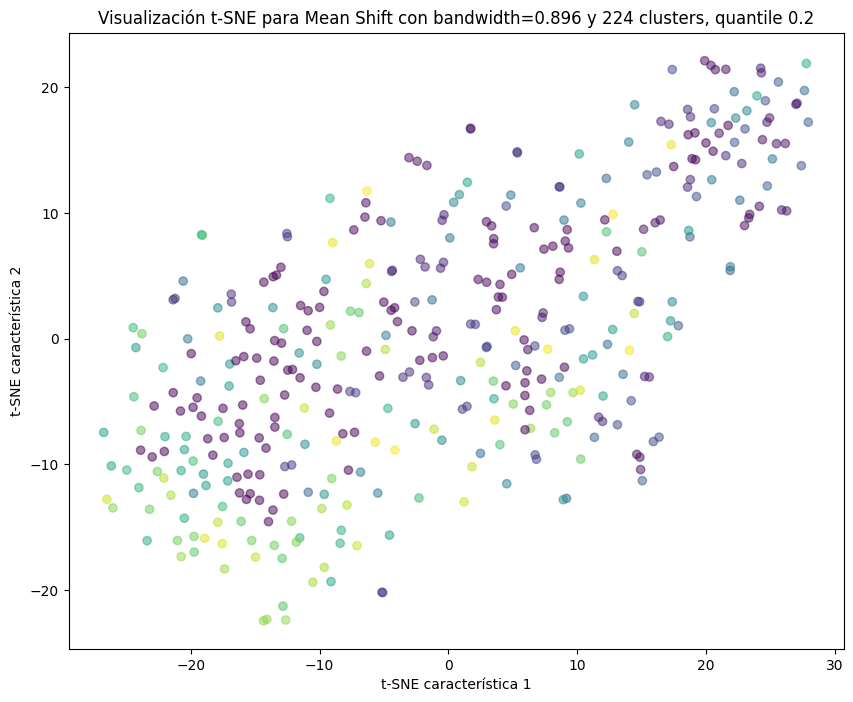

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.806543, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.8065432250840225, Silhouette Score: 0.0517442706307101, Número de Clusters: 272


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.056543, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.0565432250840225, Silhouette Score: 0.010677850994991876, Número de Clusters: 132


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62
  Mejor bandwidth: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


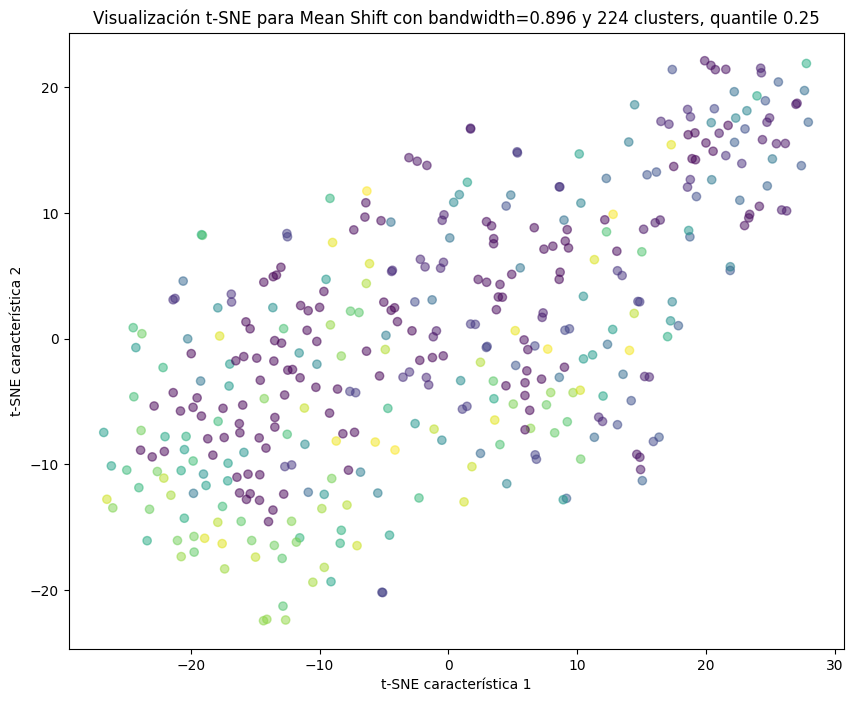

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.597859, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.5978588271636025, Silhouette Score: 0.01565852926078538, Número de Clusters: 376


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.847859, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.8478588271636025, Silhouette Score: 0.05527650721383707, Número de Clusters: 246


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.097859, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.0978588271636025, Silhouette Score: -0.0033365845877146904, Número de Clusters: 120


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62
  Mejor bandwidth: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


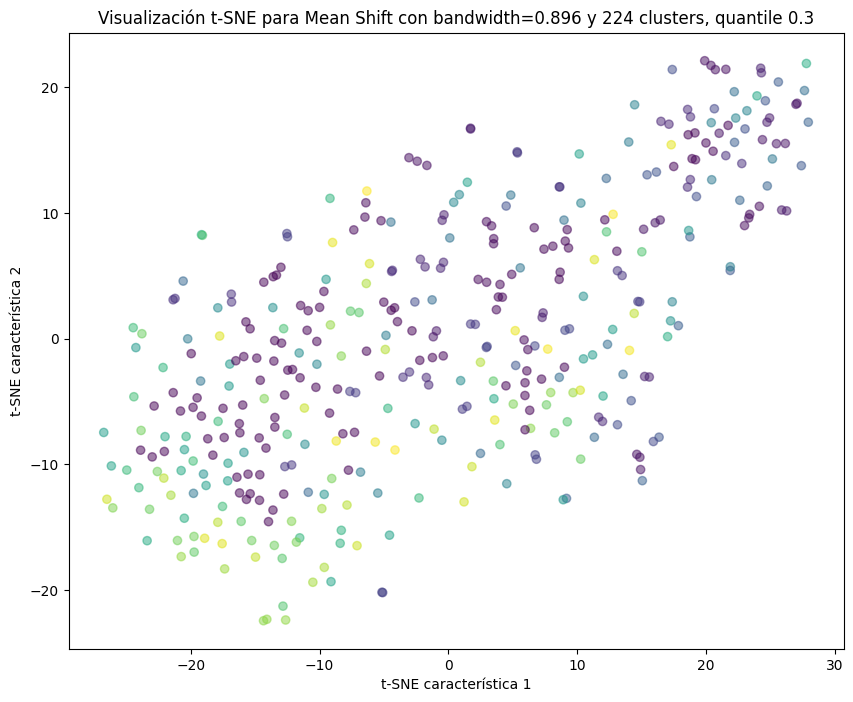

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.890037, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.8900374443715937, Silhouette Score: 0.0574218369633374, Número de Clusters: 225


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.140037, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.1400374443715937, Silhouette Score: -0.001113052966526347, Número de Clusters: 101


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=1.230000, using data points as seeds.
  warnings.warn(


  Bandwidth exitoso: 1.23, Silhouette Score: -0.005973101646295364, Número de Clusters: 62
  Mejor bandwidth: 0.896, Silhouette Score: 0.06078188597705355, Número de Clusters: 224


C:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_mean_shift.py:271: UserWarning: Binning data failed with provided bin_size=0.896000, using data points as seeds.
  warnings.warn(


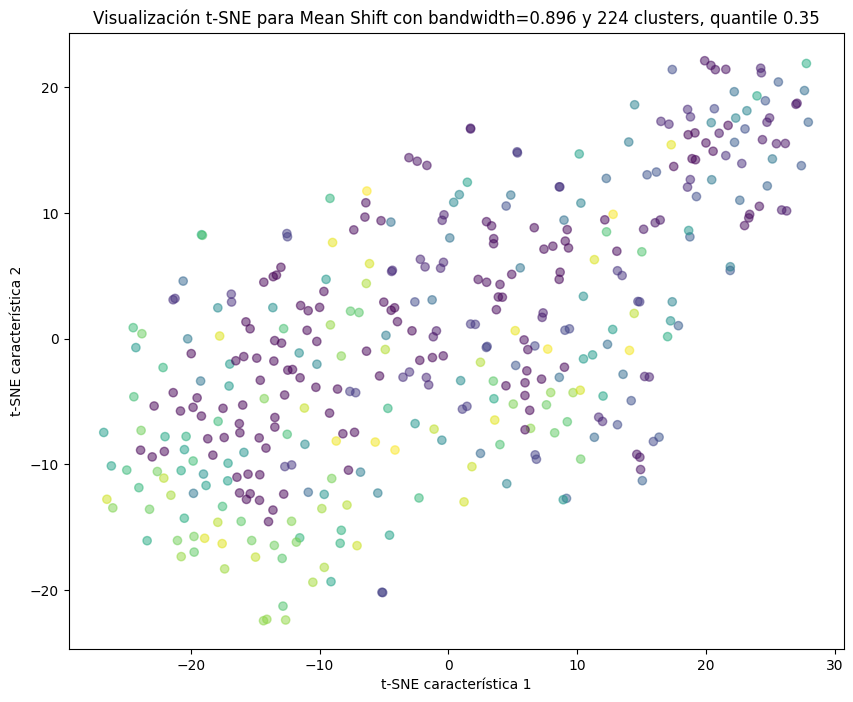

Cluster 199: [0, 139]
Cluster 0: [1, 4, 7, 11, 12, 16, 18, 20, 28, 31, 32, 36, 37, 43, 45, 51, 55, 56, 60, 66, 67, 69, 74, 78, 80, 84, 89, 112, 134, 138, 140, 153, 161, 177, 193, 199, 202, 203, 204, 208, 212, 213, 214, 221, 224, 226, 246, 248, 259, 282, 287, 295, 297, 299, 304, 306, 309, 318, 320, 322, 345, 348, 350, 352, 357, 362, 364, 366, 367, 372, 373, 380, 383, 384, 388]
Cluster 113: [2]
Cluster 147: [3]
Cluster 45: [5, 392]
Cluster 93: [6]
Cluster 63: [8]
Cluster 50: [9]
Cluster 134: [10]
Cluster 61: [13]
Cluster 2: [14, 27, 96, 147, 298, 303, 314, 321, 328, 346, 361]
Cluster 71: [15]
Cluster 146: [17]
Cluster 11: [19, 294, 395]
Cluster 137: [21]
Cluster 154: [22]
Cluster 36: [23, 301]
Cluster 18: [24, 302]
Cluster 91: [25]
Cluster 99: [26]
Cluster 30: [29, 305]
Cluster 125: [30, 146]
Cluster 176: [33]
Cluster 55: [34, 307]
Cluster 43: [35, 308]
Cluster 127: [38]
Cluster 52: [39]
Cluster 46: [40]
Cluster 60: [41]
Cluster 17: [42, 311]
Cluster 222: [44]
Cluster 76: [46, 312]
Clust

In [58]:
# Lista de valores de quantile para probar
quantile_values = [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35]

# Prepare dict to store results
results = {}

# Bucle sobre los valores de quantile
for quantile in quantile_values:
    print(f"\nProbando con quantile: {quantile}")

    # Estimación inicial del bandwidth
    initial_bandwidth = estimate_bandwidth(normalized_data, quantile=quantile)
    lower_bandwidths = np.linspace(
        max(0, initial_bandwidth - 1), initial_bandwidth, num=5
    )
    upper_bandwidths = np.linspace(initial_bandwidth, initial_bandwidth + 2, num=5)
    search_bandwidths = np.unique(np.concatenate((lower_bandwidths, upper_bandwidths)))
    search_bandwidths = np.append(search_bandwidths, [0.896, 1.23, 2, 3, 4, 5])
    search_bandwidths = np.sort(search_bandwidths)

    bandwidth_results = []

    # for the bandwidth vs silhouette score plot
    silhouette_scores = []
    valid_bandwidths = []

    for bandwidth in search_bandwidths:
        model, labels, n_clusters = try_mean_shift(normalized_data, bandwidth)
        if model is not None:
            # Ensure that the number of clusters is appropriate for silhouette score calculation
            if 1 < n_clusters < len(normalized_data):
                silhouette_avg = silhouette_score(normalized_data, labels)
                silhouette_scores.append(silhouette_avg)
                valid_bandwidths.append(bandwidth)
                print(
                    f"  Bandwidth exitoso: {bandwidth}, Silhouette Score: {silhouette_avg}, Número de Clusters: {n_clusters}"
                )
                bandwidth_results.append((bandwidth, silhouette_avg, n_clusters))
            else:
                print(
                    f"  Bandwidth encontrado: {bandwidth}, pero con número de clusters no adecuado para Silhouette Score: {n_clusters}"
                )

    if bandwidth_results:
        results[quantile] = (valid_bandwidths, silhouette_scores)
        best_bandwidth, best_score, best_clusters = max(
            bandwidth_results, key=lambda x: x[1]
        )
        print(
            f"  Mejor bandwidth: {best_bandwidth}, Silhouette Score: {best_score}, Número de Clusters: {best_clusters}"
        )

        model = MeanShift(bandwidth=best_bandwidth, bin_seeding=True)
        labels = model.fit_predict(normalized_data)
        tsne = TSNE(n_components=2, random_state=42)
        tsne_results = tsne.fit_transform(normalized_data)

        plt.figure(figsize=(10, 8))
        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, alpha=0.5)
        plt.title(
            f"Visualización t-SNE para Mean Shift con bandwidth={best_bandwidth} y {best_clusters} clusters, quantile {quantile}"
        )
        plt.xlabel("t-SNE característica 1")
        plt.ylabel("t-SNE característica 2")
        plt.show()

        clusters = {}
        for i, label in enumerate(labels):
            clusters.setdefault(label, []).append(i)

        # Printing indices in each cluster
        for cluster, indices in clusters.items():
            print(f"Cluster {cluster}: {indices}")
    else:
        print("  No se encontraron bandwidths adecuados para este quantile.")

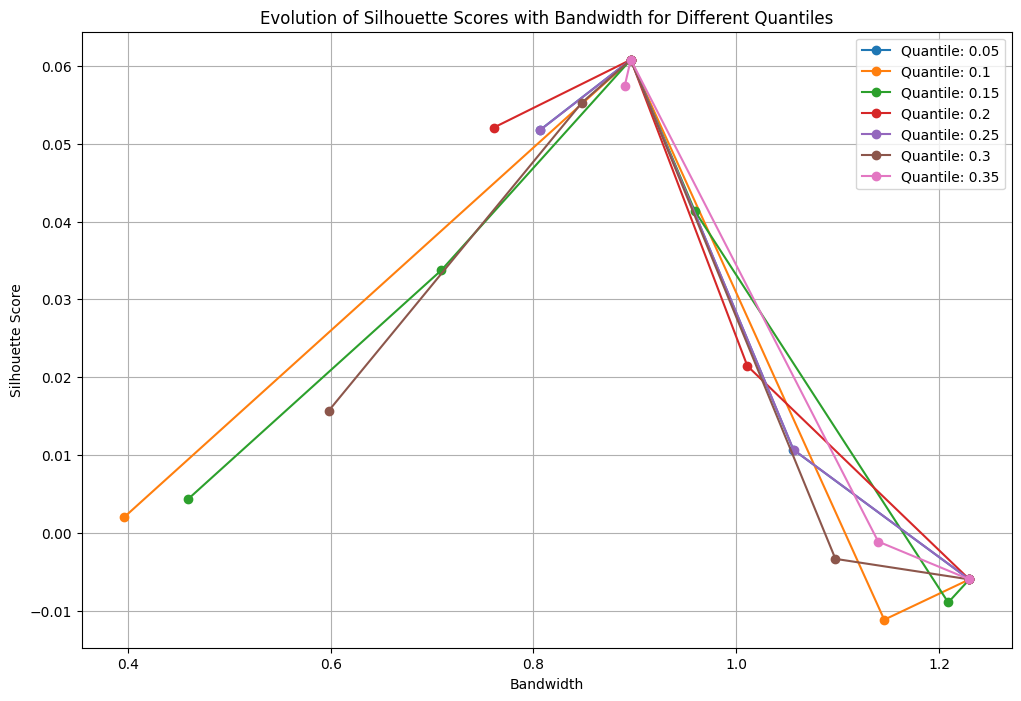

In [16]:
# Plotting the results
plt.figure(figsize=(12, 8))
for quantile, (bandwidths, scores) in results.items():
    if bandwidths:  # Check if there are valid bandwidths for this quantile
        plt.plot(bandwidths, scores, marker='o', label=f'Quantile: {quantile}')

plt.title('Evolution of Silhouette Scores with Bandwidth for Different Quantiles')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

# Set random seeds for reproducibility
np.random.seed(42)

# Función para probar Mean Shift con un dado bandwidth
def try_mean_shift(data, bandwidth):
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    try:
        labels = model.fit_predict(data)
        n_clusters = len(np.unique(labels))
        return model, labels, n_clusters
    except ValueError:
        pass
    return None, None, None

# Crear un espacio de búsqueda entre 3 y 5 de 0.2 en 0.2
search_bandwidths = np.arange(3, 5.2, 0.1)

# Búsqueda de bandwidths exitosos
bandwidth_results = []
silhouette_scores = []
valid_bandwidths = []

for bandwidth in search_bandwidths:
    model, labels, n_clusters = try_mean_shift(normalized_data, bandwidth)
    print(f"Trying bandwidth: {bandwidth}")
    if model is not None:
        silhouette_avg = silhouette_score(normalized_data, labels)
        silhouette_scores.append(silhouette_avg)
        valid_bandwidths.append(bandwidth)
        bandwidth_results.append((bandwidth, silhouette_avg, n_clusters))
        print(f"Bandwidth exitoso: {bandwidth}, Silhouette Score: {silhouette_avg}, Número de Clusters: {n_clusters}")

Trying bandwidth: 3.0
Trying bandwidth: 3.1
Trying bandwidth: 3.2
Trying bandwidth: 3.3000000000000003


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)